# Init

In [15]:
!pip install googledrivedownloader
!unzip -n dataset.zip

Archive:  dataset.zip


Downalod and convert pretrained Stanford GloVe:


In [3]:
! wget -c http://nlp.stanford.edu/data/glove.6B.zip
! unzip -n glove.6B.zip

--2019-11-05 09:16:58--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-11-05 09:16:58--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2019-11-05 09:16:58--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothin

In [4]:
from gensim.scripts.glove2word2vec import glove2word2vec

glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(400000, 100)

Downalod and convert pretrained Google News Word2Vec:

In [9]:
from google_drive_downloader import GoogleDriveDownloader as gdd
#https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
gdd.download_file_from_google_drive(file_id='0B7XkCwpI5KDYNlNUTTlSS21pQmM',
                                    dest_path='./GoogleNews-vectors-negative300.bin.gz',
                                    unzip=False)

!gunzip GoogleNews-vectors-negative300.bin.gz

gzip: GoogleNews-vectors-negative300.bin already exists; do you wish to overwrite (y or n)? n
	not overwritten


Set **environment variables**:

In [16]:
%pylab inline
import pandas as pd
from dataloader import DataLoader
import spacy
from gensim.models import KeyedVectors


WORDS_IN_TOPIC = 20
NUM_TOPICS = 6+1
TOPIC_WORDS = ['history', 'chemistry', 'biography', 'fun facts', 'art movements', 'techniques']
TARGET_TOPIC = 'chemistry'

dataloader = DataLoader(data_dir='/content/dataset', topics=TOPIC_WORDS)
df = pd.DataFrame(list(dataloader))


stanford_glove = KeyedVectors.load_word2vec_format('glove.6B.100d.txt.word2vec', binary=False)
print("Loaded Stanford GloVe!")
googlenews_word2vec = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
print("Loaded Google News Word2Vec!")

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Loaded Stanford GloVe!
Loaded Google News Word2Vec!


In [36]:
df.columns

RangeIndex(start=0, stop=1, step=1)

# BOW

In [0]:
nlp = spacy.blank("en")
texts = df[0]

In [38]:
en = spacy.load('en')
doc_en = en(texts[0])
features = [[t.orth_, t.lemma_, t.pos_, t.tag_] for t  in doc_en[20:]]
print([(ent.text, ent.label_) for ent in doc_en.ents])

[('Mona Lisa', 'PERSON'), ('The Mona Lisa', 'WORK_OF_ART'), ('Italian', 'NORP'), ('Leonardo da Vinci', 'PERSON'), ('approximately 1503 to 1506', 'DATE'), ('1517', 'DATE'), ('The Mona Lisa', 'WORK_OF_ART'), ('half', 'CARDINAL'), ('Francesco del Giocondo', 'FAC'), ('Lisa Gherardini', 'PERSON'), ('30 inch', 'QUANTITY'), ('21 inch', 'QUANTITY'), ('Leonardo da Vinci', 'PERSON'), ('Italy', 'GPE'), ('Italy', 'GPE'), ('France', 'GPE'), ('Francis', 'PERSON'), ('France', 'GPE'), ("the French Republic's", 'GPE'), ('1797', 'DATE'), ('one', 'CARDINAL'), ('Paris', 'GPE'), ('Louvre', 'GPE'), ('Mona Lisa', 'PERSON'), ('the Mona Lisa', 'ORG'), ('Monna Lisa', 'PERSON'), ('the Mona Lisa.', 'PERSON'), ('Italian', 'NORP'), ('Monna', 'PERSON'), ('Madonna', 'PERSON'), ('Lisa Gherardini', 'PERSON'), ('Leonardo da Vinci', 'PERSON'), ('Lisa Gherardini', 'PERSON'), ('24 year old', 'DATE'), ('Francesco del Giocondo', 'GPE'), ('two', 'CARDINAL'), ('Mona Lisa', 'PERSON'), ('many years', 'DATE'), ("Leonardo da Vinci

In [39]:
%time spacy_docs = list(nlp.pipe(texts))

CPU times: user 68.1 ms, sys: 5 ms, total: 73.1 ms
Wall time: 75.1 ms


In [40]:
docs = [[t.lemma_.lower() for t in doc if len(t.orth_) > 3 and not t.is_stop] for doc in spacy_docs]
print(docs[:3])

[['mona', 'lisa', 'facts', 'mona', 'lisa', 'consider', 'famous', 'paint', 'world', 'paint', 'italian', 'artist', 'leonardo', 'vinci', 'approximately', '1503', '1506', 'estimate', 'continue', 'work', 'paint', '1517', 'mona', 'lisa', 'half', 'length', 'portrait', 'figure', 'believe', 'wife', 'francesco', 'giocondo', 'lisa', 'gherardini', 'inch', 'inch', 'paint', 'original', 'paint', 'white', 'poplar', 'panel', 'leonardo', 'vinci', 'commission', 'paint', 'piece', 'italy', 'work', 'italy', 'finish', 'live', 'france', 'late', 'acquire', 'king', 'francis', 'france', 'french', 'republic', 'property', '1797', 'display', 'famous', 'museum', 'world', 'paris', 'louvre', 'interesting', 'mona', 'lisa', 'facts', 'original', 'mona', 'lisa', 'monna', 'lisa', 'spell', 'mistake', 'mona', 'lisa', 'italian', 'monna', 'mean', 'madonna', 'mean', 'lady', 'believe', 'paint', 'create', 'image', 'lisa', 'gherardini', 'believe', 'self', 'portrait', 'leonardo', 'vinci', 'lisa', 'gherardini', 'year', 'wife', 'fran

In [41]:
import re
from gensim.models.phrases import Phrases

bigram = Phrases(docs, min_count=10)

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:  # bigrams can be recognized by the "_" that joins the invidual words
            docs[idx].append(token)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [42]:
docs[1]

['mona',
 'lisa',
 'story',
 'leonardo',
 'vinci',
 'paint',
 'gioconda',
 'mona',
 'lisa',
 'probably',
 'famous',
 'portrait',
 'world',
 'paint',
 'leonardo',
 'vinci',
 '1503',
 '1514',
 'permanent',
 'display',
 'louvre',
 'paris',
 'according',
 'tradition',
 'famous',
 '16th',
 'century',
 'historiographer',
 'critic',
 'giorgiovasari',
 'woman',
 'depict',
 'lisa',
 'gherardini',
 'i.e.',
 'mona',
 'lisa',
 'short',
 'madonna',
 'signora',
 'wife',
 'noble',
 'florentine',
 'merchant',
 'francesco',
 'giocondo',
 'term',
 'gioconda',
 'stay',
 'florence',
 'leonardo',
 'live',
 'house',
 'door',
 'palazzo',
 'gondi',
 'destroy',
 'meter',
 'away',
 'piazza',
 'della',
 'signoria',
 'belong',
 'branch',
 'gherardini',
 'family',
 'identity',
 'mona',
 'lisa',
 'suggest',
 'year',
 'refer',
 'people',
 'sforza',
 'family',
 'bianca',
 'giovanna',
 'sforza',
 'caterina',
 'sforza',
 'mother',
 'caterina',
 'buti',
 'vacca',
 'whilst',
 'theory',
 'claim',
 'pacifica',
 'brindano',

In [43]:
from gensim.corpora import Dictionary

dictionary = Dictionary(docs)
print('Number of unique words in original documents:', len(dictionary))

dictionary.filter_extremes(no_below=1, no_above=0.8)
print('Number of unique words after removing rare and common words:', len(dictionary))

print("Example representation of document 3:", dictionary.doc2bow(docs[1]))

Number of unique words in original documents: 923
Number of unique words after removing rare and common words: 910
Example representation of document 3: [(0, 1), (4, 1), (5, 1), (15, 1), (17, 1), (23, 1), (31, 1), (36, 1), (39, 1), (46, 2), (50, 5), (51, 1), (52, 1), (57, 3), (58, 2), (63, 1), (69, 3), (71, 1), (76, 1), (79, 1), (80, 1), (87, 1), (88, 1), (92, 1), (108, 1), (121, 1), (124, 2), (127, 1), (129, 1), (130, 1), (137, 1), (139, 1), (140, 1), (141, 1), (142, 1), (143, 1), (144, 1), (145, 1), (146, 1), (147, 1), (148, 1), (149, 1), (150, 1), (151, 1), (152, 1), (153, 1), (154, 2), (155, 2), (156, 2), (157, 1), (158, 1), (159, 1), (160, 1), (161, 1), (162, 2), (163, 1), (164, 1), (165, 1), (166, 3), (167, 1), (168, 2), (169, 1), (170, 1), (171, 1), (172, 1), (173, 2), (174, 1), (175, 1), (176, 1), (177, 1), (178, 1), (179, 1), (180, 1), (181, 1), (182, 1), (183, 1), (184, 1), (185, 1), (186, 1), (187, 1), (188, 1), (189, 1), (190, 1), (191, 1), (192, 1), (193, 1), (194, 1), (19

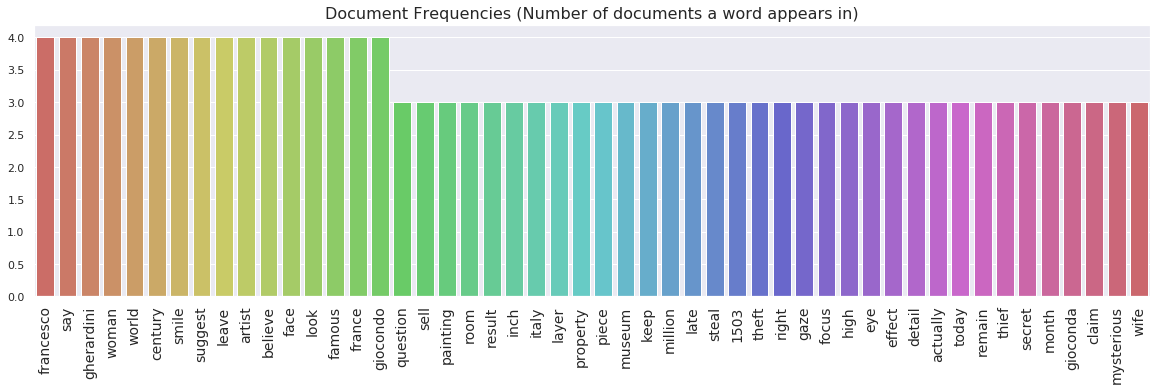

In [44]:
import seaborn as sns
sns.set()  # defines the style of the plots to be seaborn style

# I made a function out of this since I will use it again later on 
def word_frequency_barplot(df, nr_top_words=50):
    """ df should have a column named count.
    """
    fig, ax = plt.subplots(1,1,figsize=(20,5))

    sns.barplot(list(range(nr_top_words)), df['count'].values[:nr_top_words], palette='hls', ax=ax)

    ax.set_xticks(list(range(nr_top_words)))
    ax.set_xticklabels(df.index[:nr_top_words], fontsize=14, rotation=90)
    return ax

cleansed_words_df = pd.DataFrame.from_dict(dictionary.token2id, orient='index')
cleansed_words_df.rename(columns={0: 'id'}, inplace=True)

cleansed_words_df['count'] = list(map(lambda id_: dictionary.dfs.get(id_), cleansed_words_df.id))
del cleansed_words_df['id']

cleansed_words_df.sort_values('count', ascending=False, inplace=True)

ax = word_frequency_barplot(cleansed_words_df)
ax.set_title("Document Frequencies (Number of documents a word appears in)", fontsize=16);

# LDA on BOW

In [45]:
corpus = [dictionary.doc2bow(doc) for doc in docs]

print(docs[0])
print(corpus[0])

['mona', 'lisa', 'facts', 'mona', 'lisa', 'consider', 'famous', 'paint', 'world', 'paint', 'italian', 'artist', 'leonardo', 'vinci', 'approximately', '1503', '1506', 'estimate', 'continue', 'work', 'paint', '1517', 'mona', 'lisa', 'half', 'length', 'portrait', 'figure', 'believe', 'wife', 'francesco', 'giocondo', 'lisa', 'gherardini', 'inch', 'inch', 'paint', 'original', 'paint', 'white', 'poplar', 'panel', 'leonardo', 'vinci', 'commission', 'paint', 'piece', 'italy', 'work', 'italy', 'finish', 'live', 'france', 'late', 'acquire', 'king', 'francis', 'france', 'french', 'republic', 'property', '1797', 'display', 'famous', 'museum', 'world', 'paris', 'louvre', 'interesting', 'mona', 'lisa', 'facts', 'original', 'mona', 'lisa', 'monna', 'lisa', 'spell', 'mistake', 'mona', 'lisa', 'italian', 'monna', 'mean', 'madonna', 'mean', 'lady', 'believe', 'paint', 'create', 'image', 'lisa', 'gherardini', 'believe', 'self', 'portrait', 'leonardo', 'vinci', 'lisa', 'gherardini', 'year', 'wife', 'franc

In [46]:
from gensim.models.ldamulticore import LdaMulticore

%time lda = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=NUM_TOPICS, chunksize=1000, passes=10, random_state=1)

CPU times: user 233 ms, sys: 294 ms, total: 527 ms
Wall time: 838 ms


In [47]:
# words rappresenting topic 0
print([word for (word, prob) in lda.show_topic(0, topn=WORDS_IN_TOPIC)])

['look', 'smile', 'spatial', 'frequency', 'believe', 'livingstone', 'expression', 'artist', 'famous', 'room', 'detail', 'piece', 'century', 'gherardini', 'italy', 'eye', 'gaze', 'world', 'mysterious', 'high']


In [48]:
for (topic, words) in lda.print_topics():
    print(topic+1, ":", words)

1 : 0.015*"look" + 0.012*"smile" + 0.012*"spatial" + 0.012*"frequency" + 0.012*"believe" + 0.010*"livingstone" + 0.010*"expression" + 0.008*"artist" + 0.008*"famous" + 0.008*"room"
2 : 0.012*"smile" + 0.008*"leave" + 0.007*"subject" + 0.007*"french" + 0.007*"theft" + 0.007*"time" + 0.007*"look" + 0.007*"peruggia" + 0.005*"eyebrow" + 0.005*"return"
3 : 0.001*"smile" + 0.001*"look" + 0.001*"artist" + 0.001*"believe" + 0.001*"frequency" + 0.001*"famous" + 0.001*"piece" + 0.001*"painting" + 0.001*"livingstone" + 0.001*"spatial"
4 : 0.001*"look" + 0.001*"smile" + 0.001*"technique" + 0.001*"layer" + 0.001*"frequency" + 0.001*"spatial" + 0.001*"livingstone" + 0.001*"detail" + 0.001*"say" + 0.001*"walter"
5 : 0.001*"smile" + 0.001*"leave" + 0.001*"believe" + 0.001*"italy" + 0.001*"gherardini" + 0.001*"florence" + 0.001*"giocondo" + 0.001*"layer" + 0.001*"time" + 0.001*"woman"
6 : 0.031*"layer" + 0.028*"technique" + 0.016*"painting" + 0.016*"walter" + 0.013*"light" + 0.013*"color" + 0.010*"pigm

In [49]:
dfres = pd.DataFrame()
results = []
for index, data in enumerate(zip(texts, docs)):
    text, doc = data
    result = [] 
    result += dataloader.info(index)
    result += [(topic+1, prob) for (topic, prob) in lda[dictionary.doc2bow(doc)] if prob > 0.1]
    result.append(text)
    results.append(result)

print("With LDA we can find the main topics with a discrete precision (but we don't know exactly the subject of the topic):")
pd.DataFrame(results, columns=['Subject','Ground truth','Filename','Topics,Probability','Text'])

With LDA we can find the main topics with a discrete precision (but we don't know exactly the subject of the topic):


,Subject,Ground truth,Filename,"Topics,Probability",Text
0,monalisa,fun facts,Mona Lisa Facts.txt,"(1, 0.99528563)",Mona Lisa Facts\nThe Mona Lisa is considered b...
1,monalisa,history,Mona Lisa: the story of Leonardo Da Vinci’s pa...,"(7, 0.9961026)",Mona Lisa: the story of Leonardo Da Vinci’s pa...
2,monalisa,chemistry,Mona Lisa’s Smile.txt,"(1, 0.99630404)",TRANSCRIPT\nHiding a smile in the shadows. I'm...
3,monalisa,history,The History and Legacy of Leonardo da Vinci’s ...,"(1, 0.99587667)",The History and Legacy of Leonardo da Vinci’s ...
4,monalisa,fun facts,14 Things You Didn't Know About the Mona Lisa.txt,"(2, 0.998217)",Her tricky smile and timeless allure have insp...
5,monalisa,chemistry,Mona Lisa’s Secret.txt,"(6, 0.9957131)",Sfumato Technique\nMona Lisa’s mystical smile ...


# Embeddings Word2Vec

In [50]:
import gensim

salient_words_per_text = []

for doc in docs:
  topic_ids = [topic for (topic, prob) in lda[dictionary.doc2bow(doc)] if prob > 0.1]
  words = list(map(lambda x: [words for (words, prob) in x]+TOPIC_WORDS, [lda.show_topic(topic_id, topn=WORDS_IN_TOPIC) for topic_id in topic_ids]))
  salient_words_per_text += words

print(f"Salient words topics for each text:")
print(salient_words_per_text)

Salient words topics for each text:
[['look', 'smile', 'spatial', 'frequency', 'believe', 'livingstone', 'expression', 'artist', 'famous', 'room', 'detail', 'piece', 'century', 'gherardini', 'italy', 'eye', 'gaze', 'world', 'mysterious', 'high', 'history', 'chemistry', 'biography', 'fun facts', 'art movements', 'techniques'], ['florence', 'peruggia', 'gherardini', 'italy', 'sforza', 'bridge', 'bring', 'steal', 'giocondo', 'month', 'place', 'belong', 'gioconda', 'famous', 'house', 'remain', 'today', 'arezzo', 'ask', 'family', 'history', 'chemistry', 'biography', 'fun facts', 'art movements', 'techniques'], ['look', 'smile', 'spatial', 'frequency', 'believe', 'livingstone', 'expression', 'artist', 'famous', 'room', 'detail', 'piece', 'century', 'gherardini', 'italy', 'eye', 'gaze', 'world', 'mysterious', 'high', 'history', 'chemistry', 'biography', 'fun facts', 'art movements', 'techniques'], ['look', 'smile', 'spatial', 'frequency', 'believe', 'livingstone', 'expression', 'artist', 'fam

In [51]:
print(f"\nWord embedding for {TARGET_TOPIC}:")
print(googlenews_word2vec[TARGET_TOPIC])

googlenews_word2vec.wv.similar_by_word(TARGET_TOPIC, topn=10)


Word embedding for chemistry:
[ 1.43554688e-01  1.22558594e-01  9.52148438e-02  6.73828125e-02
 -1.75781250e-01  9.71679688e-02 -1.10351562e-01 -6.36718750e-01
 -7.47070312e-02 -2.81982422e-02  7.91015625e-02 -1.58203125e-01
 -4.19921875e-02  3.24707031e-02 -4.23828125e-01  2.57812500e-01
  1.59179688e-01  1.25976562e-01  2.53906250e-01 -8.10546875e-02
 -1.54296875e-01  1.04980469e-01 -5.41992188e-02  8.78906250e-02
 -9.47265625e-02  1.20605469e-01  1.35742188e-01 -1.44531250e-01
 -1.83593750e-01  7.08007812e-02 -2.50000000e-01 -2.23632812e-01
  1.14257812e-01 -1.49414062e-01  1.70898438e-01  2.44140625e-01
  1.33789062e-01  3.06640625e-01  8.25195312e-02  1.40625000e-01
 -1.77734375e-01 -3.92578125e-01 -1.68945312e-01 -5.00488281e-03
 -1.66992188e-01 -3.08593750e-01 -7.91015625e-02  3.22265625e-02
 -1.73828125e-01  2.10937500e-01 -1.69921875e-01 -9.17968750e-02
 -9.71679688e-02 -1.81640625e-01  2.14843750e-01 -4.00390625e-02
  2.11914062e-01 -1.30859375e-01 -1.52343750e-01 -1.9726562

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('chemisty', 0.6485269069671631),
 ('Chemistry', 0.586740255355835),
 ('proprietary_kinase_inhibitor', 0.5577044486999512),
 ('included_polymers_organophosphate', 0.5573148727416992),
 ('Antoine_Lavoisier', 0.5559877157211304),
 ('professor_Dady_Dadyburjor', 0.5467244982719421),
 ('lecturer_Stacie_Nakamoto', 0.5387320518493652),
 ('Adaptive_Charging', 0.5265799760818481),
 ('veterinary_hematology', 0.5187487602233887),
 ('organometallic_chemistry', 0.5111402869224548)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


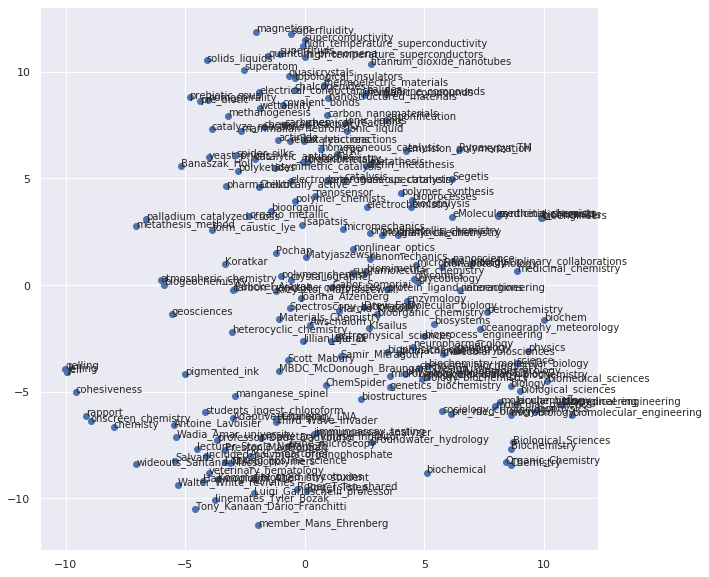

In [52]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

selected_words = [w[0] for w in googlenews_word2vec.wv.most_similar(positive=[TARGET_TOPIC], topn=200)]
embeddings = [googlenews_word2vec[w] for w in selected_words if w in googlenews_word2vec]

mapped_embeddings = TSNE(n_components=2, metric='cosine', init='pca').fit_transform(embeddings)

plt.figure(figsize=(10,10))
x = mapped_embeddings[:,0]
y = mapped_embeddings[:,1]
plt.scatter(x, y)

for i, txt in enumerate(selected_words):
    plt.annotate(txt, (x[i], y[i]))
plt.show()

# Clustering

In [0]:
#----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, y, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(10, 10))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    #plt.xticks([])
    #plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    #plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [0]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

salient_words = salient_words_per_text[0]
vocab = salient_words
vectors = [googlenews_word2vec[w] for w in vocab if w in googlenews_word2vec]
vectors_norm = normalize(vectors)

clusterer = AgglomerativeClustering(n_clusters=NUM_TOPICS, affinity="euclidean")
clusters = clusterer.fit_predict(vectors_norm)

In [0]:
cluster_dictionary = {}
for cluster, word in zip(clusters, vocab): 
    if cluster not in cluster_dictionary:
        cluster_dictionary[cluster] = []
    cluster_dictionary[cluster].append(word)

In [57]:
for x in cluster_dictionary:
    if "history" in cluster_dictionary[x]:
        print(cluster_dictionary[x])

['livingstone', 'expression', 'room', 'detail', 'history']


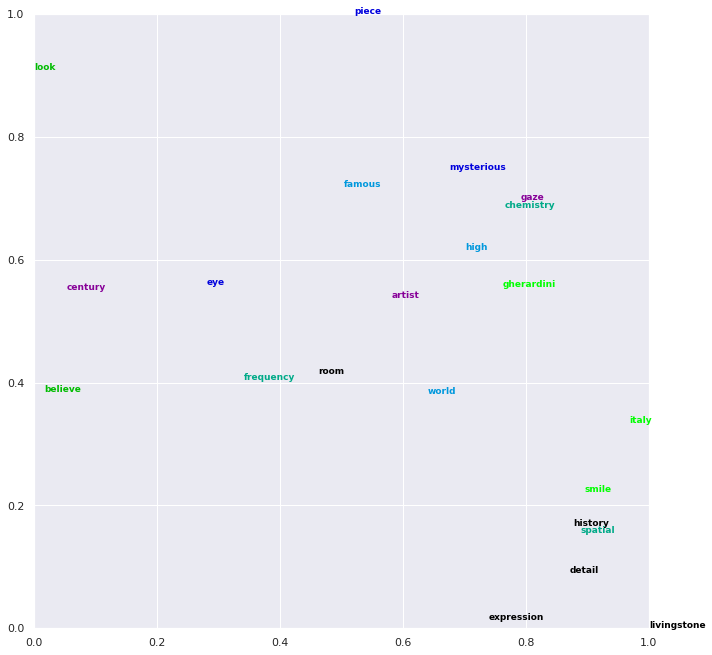

In [58]:
plot_clustering(vectors_norm, vocab, clusterer.labels_)

# Test
Testing the procedure searching the clusters on Word2Vec an GloVe LDA's topic words

In [0]:
class DocumentModel():
  def __init__(self, text, info=[]):
    self.embeddings = []
    self.info = info
    self.text = text 
    self.doc = []
    self.salient_words = []
    self.assigned_topics = []
    self.clusters = []

In [0]:
models = []
for i in range(len(dataloader)):
  model = DocumentModel(dataloader.__item__(i), dataloader.info(i))
  model.doc = docs[i]
  models.append(model)

In [76]:
%%time
import gensim

TARGET_TOPIC = 'chemistry'

for model in models:
  doc = model.doc
  topic_ids = [topic for (topic, prob) in lda[dictionary.doc2bow(doc)] if prob > 0.1]
  words = list(map(lambda x: [words for (words, prob) in x]+TOPIC_WORDS, [lda.show_topic(topic_id, topn=WORDS_IN_TOPIC) for topic_id in topic_ids]))
  model.salient_words = words[0]

print(f"Salient words topics for each text:")
for i, model in enumerate(models): print(f"Text {i+1} salient words: {model.salient_words}")

for model in models:
  # Load GoogleNews Word2Vec and Stanford GloVe 
  embeddings_models = [googlenews_word2vec, stanford_glove]
  vocab = model.salient_words
  for embeddings_model in embeddings_models:
    model.embeddings.append([embeddings_model[w] for w in vocab if w in embeddings_model])

print(f"Different embeddings per document: {len(models[0].embeddings)}")

Salient words topics for each text:
Text 1 salient words: ['look', 'smile', 'spatial', 'frequency', 'believe', 'livingstone', 'expression', 'artist', 'famous', 'room', 'detail', 'piece', 'century', 'gherardini', 'italy', 'eye', 'gaze', 'world', 'mysterious', 'high', 'history', 'chemistry', 'biography', 'fun facts', 'art movements', 'techniques']
Text 2 salient words: ['florence', 'peruggia', 'gherardini', 'italy', 'sforza', 'bridge', 'bring', 'steal', 'giocondo', 'month', 'place', 'belong', 'gioconda', 'famous', 'house', 'remain', 'today', 'arezzo', 'ask', 'family', 'history', 'chemistry', 'biography', 'fun facts', 'art movements', 'techniques']
Text 3 salient words: ['look', 'smile', 'spatial', 'frequency', 'believe', 'livingstone', 'expression', 'artist', 'famous', 'room', 'detail', 'piece', 'century', 'gherardini', 'italy', 'eye', 'gaze', 'world', 'mysterious', 'high', 'history', 'chemistry', 'biography', 'fun facts', 'art movements', 'techniques']
Text 4 salient words: ['look', 'sm

In [77]:
# One w2v model foreach document
for model in models: model.clusters = []
for model in models:
  for embedding in model.embeddings:
    vectors_norm = normalize(embedding)

    clusterer = AgglomerativeClustering(n_clusters=NUM_TOPICS, affinity="euclidean")
    clusters = clusterer.fit_predict(vectors_norm)

    cluster_dictionary = {}
    # translate clutesrs of world_id in clusters of words
    for cluster, word in zip(clusters, vocab): 
        if cluster not in cluster_dictionary:
            cluster_dictionary[cluster] = []
        cluster_dictionary[cluster].append(word)

    # calculate words in cluster / words in topic
    topic_clusters_len = {}
    total_words_in_cluster = 0
    for x in cluster_dictionary:
      for topic in TOPIC_WORDS:
        if topic in cluster_dictionary[x]:
          topic_clusters_len[topic] = len(cluster_dictionary[x])
      total_words_in_cluster += len(cluster_dictionary[x])

    main_clusters = ([(x,topic_clusters_len[x]/total_words_in_cluster) for x in topic_clusters_len])

    for topic in main_clusters:
      find_indx = [i for i,x in enumerate(model.clusters) if x[0]==topic[0]]
      if len(find_indx)>0:
        # if topic is yet in model.clusters add only probability
        model.clusters[find_indx[0]] = (topic[0], model.clusters[find_indx[0]][1]+topic[1])
      else:
        # else add topic to model.clusters
        model.clusters += [topic]

[print(model.clusters) for model in models]

[('chemistry', 0.7613636363636364), ('fun facts', 0.625), ('history', 0.8522727272727273), ('biography', 0.625)]
[('chemistry', 0.5217391304347826), ('history', 0.2608695652173913), ('biography', 0.2608695652173913)]
[('chemistry', 0.7613636363636364), ('fun facts', 0.625), ('history', 0.8522727272727273), ('biography', 0.625)]
[('chemistry', 0.7613636363636364), ('fun facts', 0.625), ('history', 0.8522727272727273), ('biography', 0.625)]
[('history', 1.3181818181818183), ('chemistry', 0.4545454545454546)]
[('fun facts', 0.3333333333333333), ('history', 0.875), ('chemistry', 0.875), ('biography', 0.875)]


[None, None, None, None, None, None]

In [83]:
texts_affinity = []
for model in models:
  texts_affinity += [x[1] for x in model.clusters if x[0]==TARGET_TOPIC]

for i in range(len(models)):
  print(f"{models[i].info} -> affinity:", texts_affinity[i])

best_text = np.argmax(texts_affinity)

print(f"Selected text for topic `{TARGET_TOPIC}` is: {models[best_text].info}")

['monalisa', 'fun facts', 'Mona Lisa Facts.txt'] -> affinity: 0.7613636363636364
['monalisa', 'history', 'Mona Lisa: the story of Leonardo Da Vinci’s painting.txt'] -> affinity: 0.5217391304347826
['monalisa', 'chemistry', 'Mona Lisa’s Smile.txt'] -> affinity: 0.7613636363636364
['monalisa', 'history', 'The History and Legacy of Leonardo da Vinci’s Mysterious ‘Mona Lisa’.txt'] -> affinity: 0.7613636363636364
['monalisa', 'fun facts', "14 Things You Didn't Know About the Mona Lisa.txt"] -> affinity: 0.4545454545454546
['monalisa', 'chemistry', 'Mona Lisa’s Secret.txt'] -> affinity: 0.875
Selected text for topic `chemistry` is: ['monalisa', 'chemistry', 'Mona Lisa’s Secret.txt']
